In [1]:
import pickle
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
infos = []
idx_tups = []
for file in glob.glob("../../data/texas_u*"):
    infos.append(pickle.load(open(file, 'rb')))
    print(file, type(infos[-1]))
    var = file.split("_")[-4:]
    i = infos[-1]
    a, y, m = max([(a, yt - yf, mt  - mf) for a, yt, yf, mt, mf in zip(i['acc'], i['yeom_tpr'], i['yeom_fpr'], i['merlin_tpr'], i['merlin_fpr'])])
    infos[-1]['acc'] = a
    infos[-1]['adv'] = y
    infos[-1]['merlin_adv'] = m
    if var[-4] == 'baseline' or var[-4] == 'b':
        var[-4] = 'dp'
    else:
        var[-4] = 'is'
    var[-1] = int(var[-1].split(".")[0])
    var[-3] = int(var[-3])
    var[-2] = float(var[-2]) if var[-2] != 'False' else False
    # IDX tups follow the format (epsilon, throw out threshold, batch size)
    idx_tups.append(var)

../../data/texas_u_b_50000_0.4_32.b <class 'collections.defaultdict'>
../../data/texas_u_100000_5_64.b <class 'collections.defaultdict'>
../../data/texas_u_10000_2_64.b <class 'collections.defaultdict'>
../../data/texas_u_b_1000_0.8_32.b <class 'collections.defaultdict'>
../../data/texas_u_b_10000_0.2_32.b <class 'collections.defaultdict'>
../../data/texas_u_b_50000_0.2_32.b <class 'collections.defaultdict'>
../../data/texas_u_10_5_64.b <class 'collections.defaultdict'>
../../data/texas_u_10_1_64.b <class 'collections.defaultdict'>
../../data/texas_u_b_1_0.2_32.b <class 'collections.defaultdict'>
../../data/texas_u_b_100000_0.8_32.b <class 'collections.defaultdict'>
../../data/texas_u_b_1_0.4_32.b <class 'collections.defaultdict'>
../../data/texas_u_100_0.5_64.b <class 'collections.defaultdict'>
../../data/texas_u_100_1_64.b <class 'collections.defaultdict'>
../../data/texas_u_50000_0.5_64.b <class 'collections.defaultdict'>
../../data/texas_u_50000_2_64.b <class 'collections.defaultdi

In [3]:
infos[0].keys(), [len(v) for v in infos[0].values() if type(v) == list]

(dict_keys(['max_norms', 'train_l', 'test_l', 'yeom_tpr', 'yeom_fpr', 'acc', 'merlin_tpr', 'merlin_fpr', 'adv', 'merlin_adv']),
 [37500, 20, 20, 20, 20, 20, 20])

In [9]:
inf_scalars = [(i[0]['acc'], i[0]['adv'][-1] if type(i[0]['adv']) == list else i[0]['adv'],  i[0]['merlin_adv'][-1][0] if type(i[0]['merlin_adv']) == list else i[0]['merlin_adv'], *i[1]) for i in zip(infos, idx_tups)]
ds = pd.DataFrame(inf_scalars)
ds.columns = ['acc', 'yeom', 'merlin', 'method', 'epsilon', 'throw out', 'batch_size']

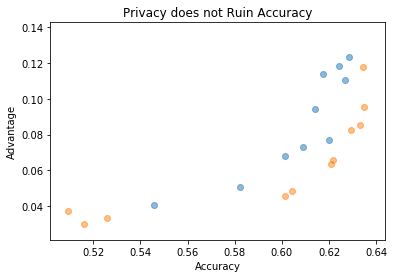

In [8]:
de = ds[(ds['acc'] > .5) & (ds['yeom'] < .15)]
dps = de[de['method'] == 'dp']
iss = de[de['method'] == 'is']
plt.scatter(dps['acc'], dps['yeom'], label='DP',alpha=.5)
plt.scatter(iss['acc'], iss['yeom'], label='IS', alpha=.5)
plt.xlabel('Accuracy')
plt.ylabel('Advantage')
plt.title('Privacy does not Ruin Accuracy')
plt.show()

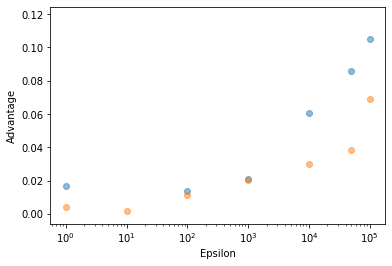

(array([ 50000,   1000,  10000,      1, 100000,    100]),
 array([100000,  10000,     10,    100,  50000,   1000,      1]))

In [19]:
dps = ds[ds['method'] == 'dp']
iss = ds[ds['method'] == 'is']
depsilons = dps['epsilon'].unique()
iepsilons = iss['epsilon'].unique()
imeans = []
for i in iepsilons:
    imeans.append(np.mean(iss[(iss['epsilon'] == i)]['yeom']))
dmeans = []
for i in depsilons:
    dmeans.append(np.mean(dps[dps['epsilon'] == i]['yeom']))
plt.scatter(depsilons, dmeans, label='DP', alpha=.5)
plt.scatter(iepsilons, imeans, label='IS', alpha=.5)
plt.xlabel('Epsilon')
plt.xscale('log')
plt.ylabel('Advantage')
plt.show()
depsilons, iepsilons

In [6]:
ds[ds['acc'] > .6].sort_values('epsilon')

,acc,yeom,merlin,method,epsilon,throw out,batch_size
20,0.604167,0.048367,0.041406,is,1000,5,64
36,0.601425,0.045457,0.068750,is,1000,False,64
4,0.614083,0.094089,0.073438,dp,10000,0.2,32
27,0.620751,0.063507,0.055469,is,10000,5,64
28,0.617358,0.113971,0.175000,dp,10000,0.1,32
58,0.621711,0.065793,0.039062,is,10000,False,64
0,0.608897,0.073117,0.073438,dp,50000,0.4,32
5,0.626910,0.110763,0.064063,dp,50000,0.2,32
26,0.624318,0.118308,0.081250,dp,50000,0.1,32
48,0.629386,0.082867,0.082813,is,50000,5,64


In [7]:
ds.sort_values('acc', ascending=False)[0:50]

,acc,yeom,merlin,method,epsilon,throw out,batch_size
65,0.634868,0.095279,0.089844,is,50000,False,64
44,0.634594,0.117870,0.079688,is,100000,False,64
1,0.632950,0.085332,0.058594,is,100000,5,64
48,0.629386,0.082867,0.082813,is,50000,5,64
63,0.628412,0.123527,0.106250,dp,100000,0.1,32
5,0.626910,0.110763,0.064063,dp,50000,0.2,32
26,0.624318,0.118308,0.081250,dp,50000,0.1,32
58,0.621711,0.065793,0.039062,is,10000,False,64
27,0.620751,0.063507,0.055469,is,10000,5,64
38,0.620087,0.077081,0.053125,dp,100000,0.4,32


In [10]:
acc_idx = ds.groupby(['epsilon', 'throw out'])['acc'].transform(max) == ds['acc']
yeom_idx = ds.groupby(['epsilon', 'throw out'])['yeom'].transform(min) == ds['yeom']
merlin_idx = ds.groupby(['epsilon', 'throw out'])['merlin'].transform(min) == ds['merlin']
acc_d = ds[acc_idx]
yeom_d = ds[yeom_idx]
merlin_d = ds[merlin_idx]

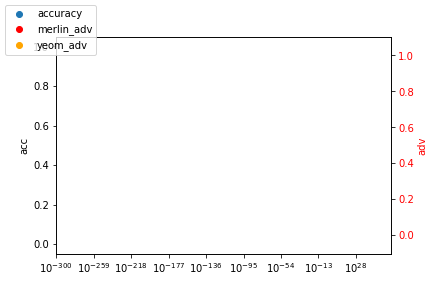

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
d = acc_d
df = d[(d['throw out'] == False) & (d['epsilon'] > 0)]
ax1.scatter(df['epsilon'], df['acc'] , label="accuracy")
ax1.set_ylabel('acc')
ax1.set_xscale('log')

ax2 = ax1.twinx()
ax2.scatter(df['epsilon'], df['merlin'],c='red', label='merlin_adv')
ax2.scatter(df['epsilon'], df['yeom'],c='orange', label='yeom_adv')
ax2.set_ylabel('adv', color='r')
ax2.set_xscale('log')
fig.legend(loc='upper left')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
#ax2.set_title('epsilon=50000')



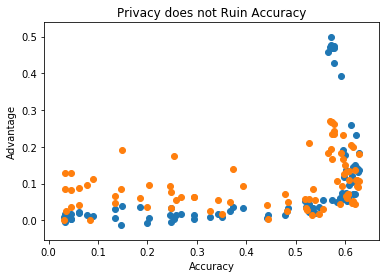

In [26]:
plt.scatter(ds['acc'], ds['yeom'], label='Yeom')
plt.scatter(ds['acc'], ds['merlin'], label='Merlin')
plt.xlabel('Accuracy')
plt.ylabel('Advantage')
plt.title('Privacy does not Ruin Accuracy')
plt.show()